In [1]:
#Makes Jupyter wider
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pybdf
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from time import time

In [3]:
def importBDF(filename, useCpp=False):
    """returns dataMatrix, eventTable, chanLabels"""
    if len(filename) > 0:
        rec1 = pybdf.bdfRecording(filename)

        data1 = rec1.getData(trigChan=True, useCpp=useCpp)

        #retrieve sampling rates (list of sampling rate of each channel)
        sampRate1 = rec1.sampRate
        print("**********************")
        print("The sampling rate of, ", filename, "is", sampRate1[0], "Hz")
        print()

        dur1 = rec1.duration
        #retrieve recording durations (list of recording durations of each channel)
        print("**********************")
        print("The duration of, ", filename, "is", dur1, "seconds")
        print()

        dataMatrix = data1['data']
        #time_array1 = np.arange(dataMatrix1.shape[1]) / rec1.sampRate[0]

        chanLabels = rec1.chanLabels 

        eventTable = data1['eventTable']
        
        return dataMatrix, eventTable, chanLabels
    else:
        print("--Please enter a file--")

Importing:  .\Newtest17-2048.bdf
**********************
The sampling rate of,  .\Newtest17-2048.bdf is 2048 Hz

**********************
The duration of,  .\Newtest17-2048.bdf is 60.0 seconds

Time taken:  0.041848182678222656 

Fortran Channels: 
 ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'Status'] 

Fortran data: 
 (16, 122880) 

Fortran events: 
 {'code': array([255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255,
       254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254,
       255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255,
       254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254,
       255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255,
       254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254,
       255, 254], dtype=uint8), 'idx': array([     0,   1450,   3352,   4781,   7353,   8851,  10929,  12154,
        15046,  16141,  18324,  19772

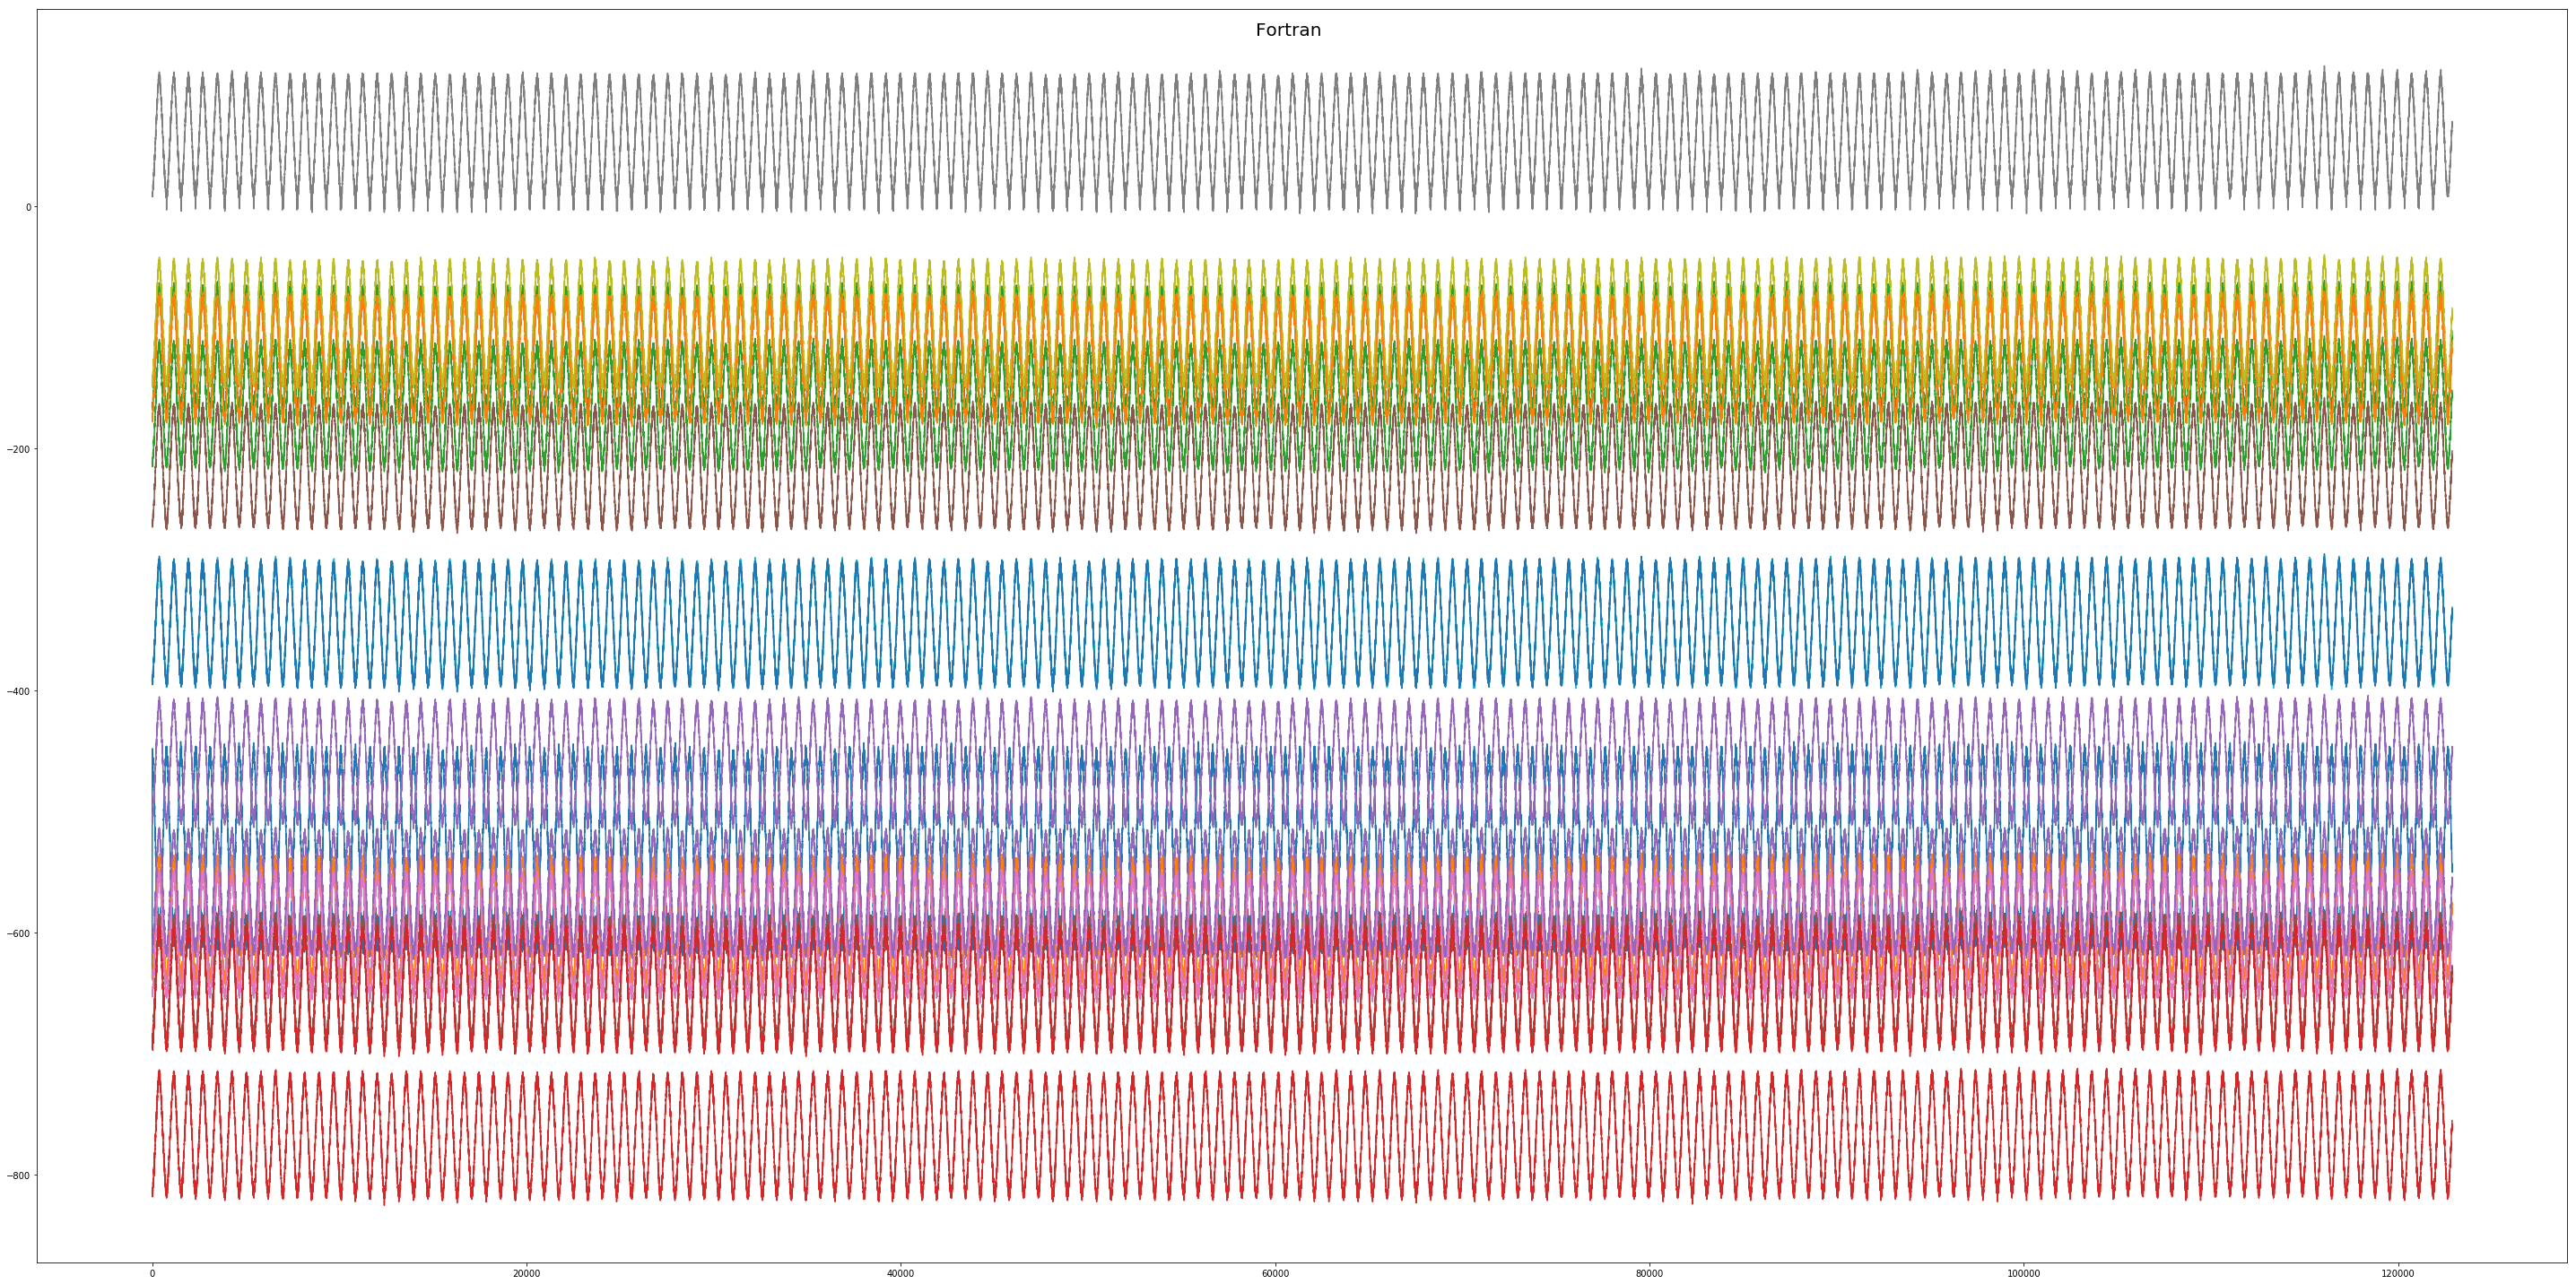

In [4]:
file = glob('./*2048*')[0]
print("Importing: ", file)

now = time()
fort_data, fort_event, fort_chan = importBDF(file, useCpp=False)
print('Time taken: ', time() - now, '\n')

print('Fortran Channels: \n', fort_chan, '\n')

print('Fortran data: \n', fort_data.shape, '\n')

print('Fortran events: \n', fort_event, '\n')

x = np.linspace(0, fort_data.shape[1] - 1, fort_data.shape[1])

plt.figure(figsize=(40,20))
for i in range(fort_data.shape[0]):
    plt.plot(x, fort_data[i,:])
plt.suptitle('Fortran', fontsize=20)
plt.tight_layout()
plt.show()
plt.close()

**********************
The sampling rate of,  .\Newtest17-2048.bdf is 2048 Hz

**********************
The duration of,  .\Newtest17-2048.bdf is 60.0 seconds

Time taken:  0.036930084228515625 

C++ Channels: 
 ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'Status'] 

C++ data: 
 (16, 122880) 

C++ events: 
 {'code': array([255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255,
       254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254,
       255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255,
       254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254,
       255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255,
       254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254, 255, 254,
       255, 254], dtype=uint8), 'idx': array([     0,   1450,   3352,   4781,   7353,   8851,  10929,  12154,
        15046,  16141,  18324,  19772,  21909,  23332,  25105,  26336,
        280

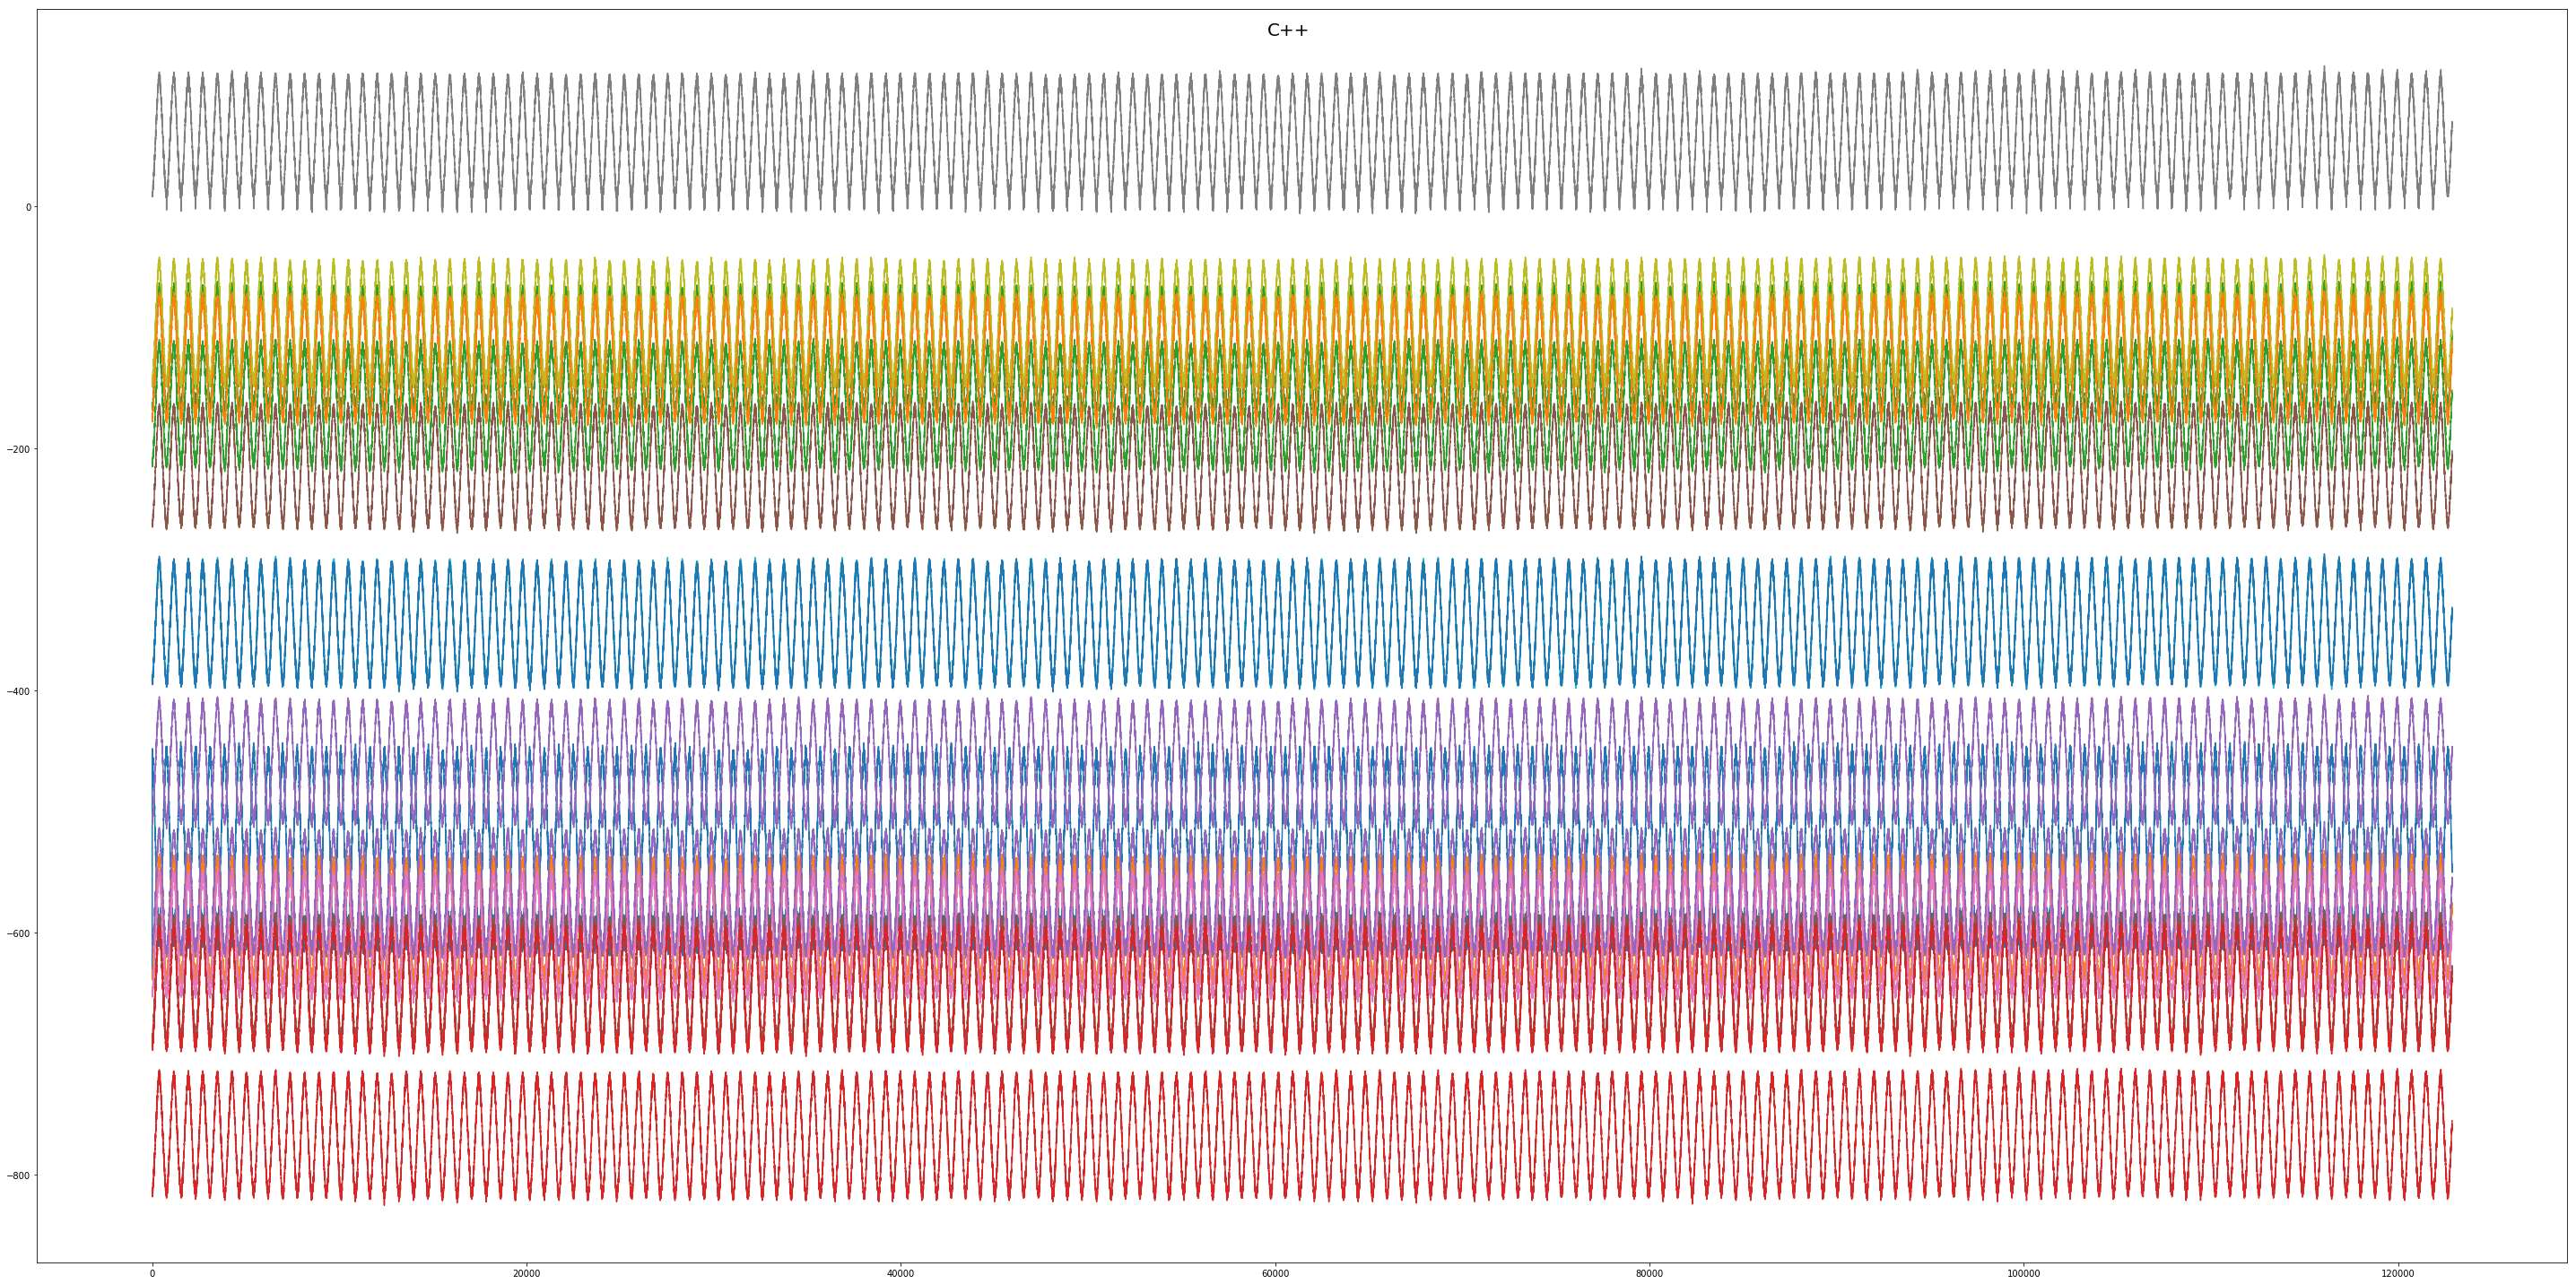

In [5]:
now = time()
cpp_data, cpp_event, cpp_chan = importBDF(file, useCpp=True)
print('Time taken: ', time() - now, '\n')

print('C++ Channels: \n', cpp_chan, '\n')

print('C++ data: \n', cpp_data.shape, '\n')

print('C++ events: \n', cpp_event, '\n')

plt.figure(figsize=(40,20))
for i in range(cpp_data.shape[0]):
    plt.plot(x, cpp_data[i,:])
plt.suptitle('C++', fontsize=20)
plt.tight_layout()
plt.show()
plt.close()

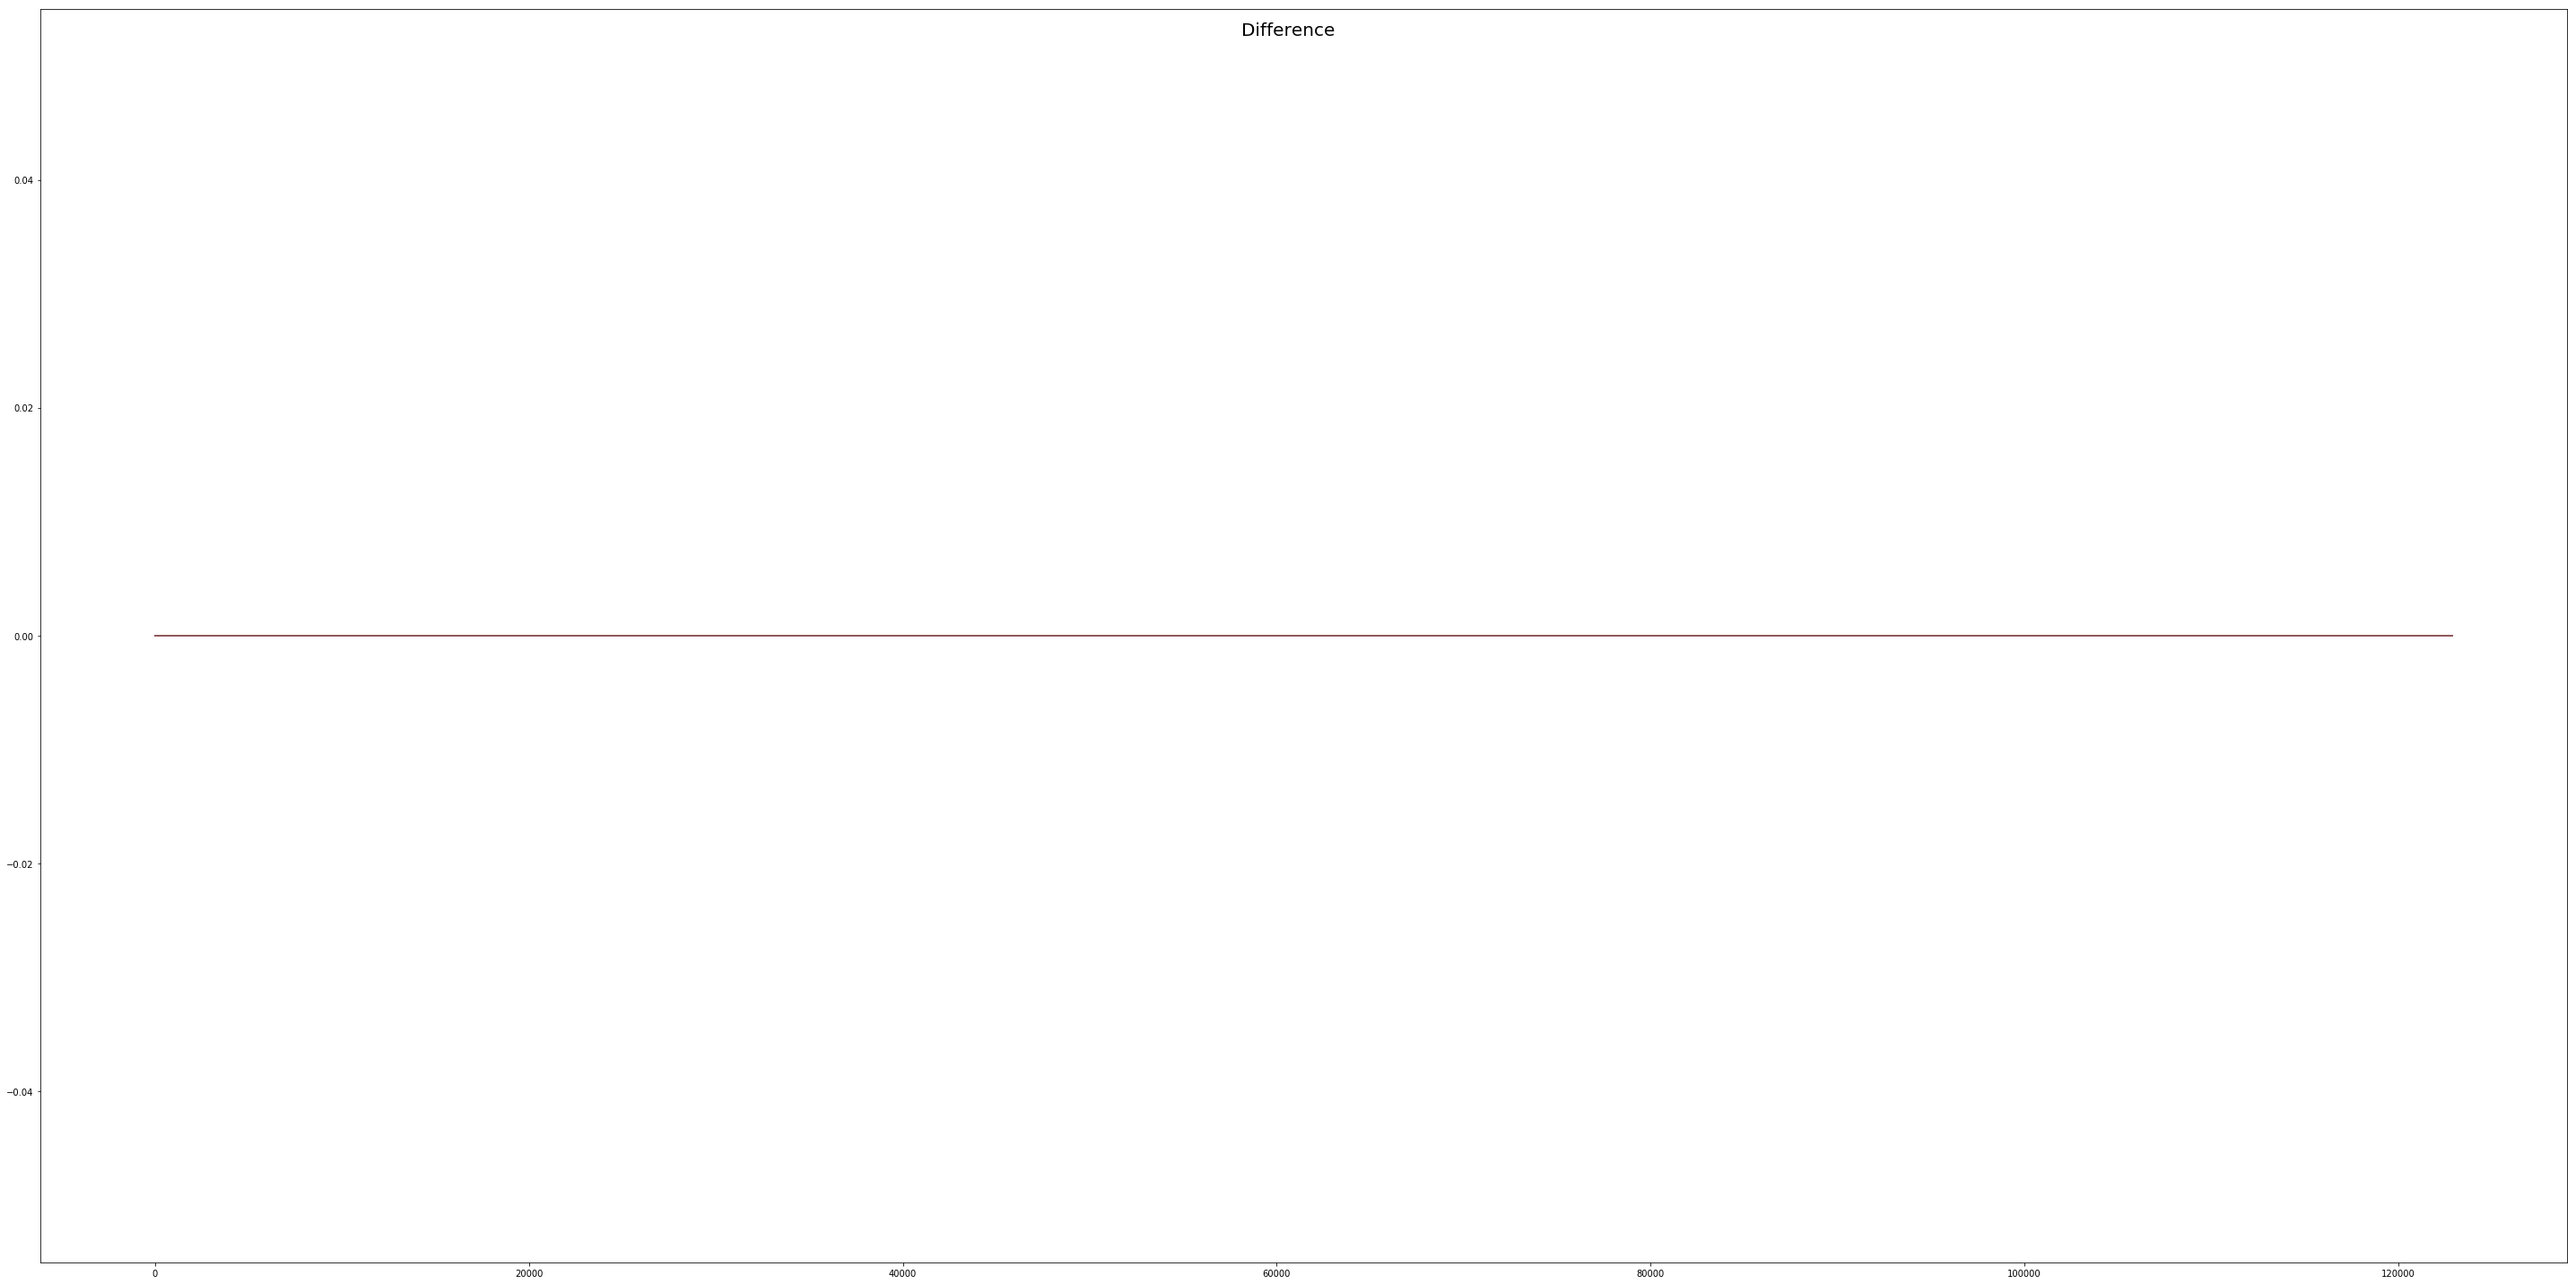

In [6]:
plt.figure(figsize=(40,20))
for i in range(cpp_data.shape[0]):
    plt.plot(x, fort_data[i,:] - cpp_data[i,:])
plt.suptitle('Difference', fontsize=20)
plt.tight_layout()
plt.show()
plt.close()

In [7]:
rec_out = pybdf.bdfRecording('./out_2048.bdf')

out_cpp_codes = np.arange(1, cpp_event['code'].shape[0] + 1, 1, dtype=np.uint8)
out_cpp_times = (cpp_event['idx'] + 1)

print(out_cpp_codes, '\n', out_cpp_times, '\n')

rec_out.write_triggers(out_cpp_codes, out_cpp_times)

test_cpp_data, test_cpp_event, test_cpp_chan = importBDF('./out_2048.bdf', useCpp=True)

print('C++ Channels: \n', cpp_chan, '\n')

print('C++ data: \n', cpp_data.shape, '\n')

print('C++ events: \n', cpp_event, '\n')

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80] 
 [     1   1451   3353   4782   7354   8852  10930  12155  15047  16142
  18325  19773  21910  23333  25106  26337  28072  29637  31168  32388
  34128  35290  36951  38277  40163  41064  42737  44064  46300  47377
  48682  49705  51536  52775  54848  56003  57890  58874  60756  61951
  63768  64876  66571  68075  69695  71049  72851  73834  75452  76797
  78283  79563  81451  82605  84358  85677  87551  88821  90301  91628
  93204  94446  96103  97356  99348 100289 101965 103262 105283 106230
 107742 109049 110616 111782 113519 114874 116877 118319 120120 121150] 

**********************
The sampling rate of,  ./out_2048.bdf is 2048 Hz

**********************
The duration of,  ./out_2048.bdf is 60.0 seconds

C++ Channels: 
 ['A1', 'A2', 'A3', '